In [7]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, BasicAer
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.ibmq import least_busy
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


In [3]:
s = '11'

In [4]:
n = 2*len(str(s))
simonCircuit = QuantumCircuit(n)
barriers = True
simonCircuit.h(range(len(str(s))))

if barriers:
    simonCircuit.barrier()

simonCircuit.cx(0, len(str(s)) + 0)
simonCircuit.cx(0, len(str(s)) + 1)
simonCircuit.cx(1, len(str(s)) + 0)
simonCircuit.cx(1, len(str(s)) + 1)

if barriers:
    simonCircuit.barrier()
simonCircuit.h(range(len(str(s))))
simonCircuit.measure_all()

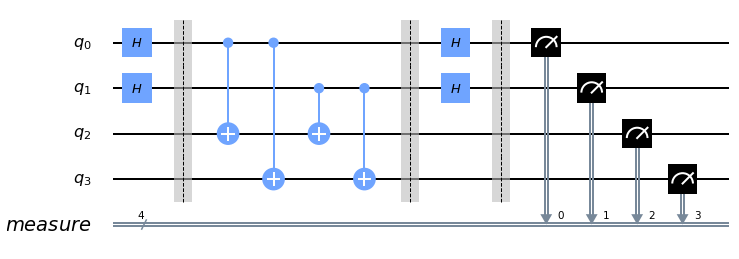

In [5]:
simonCircuit.draw(output='mpl')

{'11': 503, '00': 521}


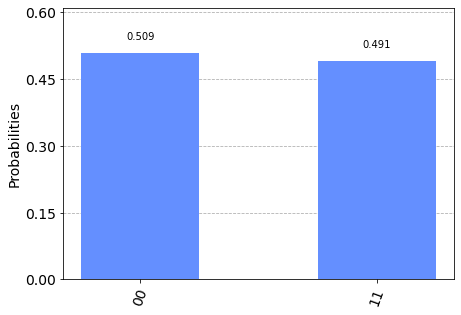

In [11]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
answer = execute(simonCircuit, backend=backend, shots=shots).result().get_counts()

answer_plot = {}
for measresult in answer.keys():
    measresult_input = measresult[len(str(s)):]
    if measresult_input in answer_plot:
        answer_plot[measresult_input] += answer[measresult]
    else:
        answer_plot[measresult_input] = answer[measresult]
print(answer_plot)
plot_histogram(answer_plot)

In [12]:
def sdotz(a, b):
    accum = 0
    for i in range(len(a)):
        accum += int(a[i]) * int(b[i])
    return (accum % 2)

print('s, z, s.z (mod 2)')
for z_rev in answer_plot:
    z = z_rev[::-1]
    print( '{}, {}, {}.{}={}'.format(s, z, s,z,sdotz(s,z)) )

s, z, s.z (mod 2)
11, 11, 11.11=0
11, 00, 11.00=0


In [13]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_16_melbourne


In [14]:
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(simonCircuit, backend=backend, shots=shots)

job_monitor(job, interval = 2)

Job Status: job has successfully run


{'11': 503, '00': 521}


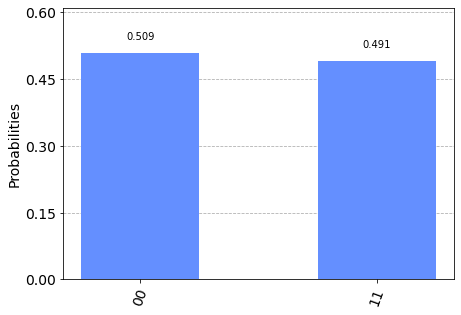

In [15]:
answer_plot = {}
for measresult in answer.keys():
    measresult_input = measresult[len(str(s)):]
    if measresult_input in answer_plot:
        answer_plot[measresult_input] += answer[measresult]
    else:
        answer_plot[measresult_input] = answer[measresult] 

print(answer_plot)
plot_histogram(answer_plot)

In [16]:
print('s, z, s.z (mod 2)')
for z_rev in answer_plot:
    if answer_plot[z_rev] >= 0.1*shots:
        z = z_rev[::-1]
        print( '{}, {}, {}.{}={}'.format(s, z, s,z,sdotz(s,z)) )

s, z, s.z (mod 2)
11, 11, 11.11=0
11, 00, 11.00=0
